<a href="https://colab.research.google.com/github/light624/PacMan-Game/blob/main/TP1_MLP_MNIST_2425_version_etudiant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 : Classification d'images via MLP

L'objectif de ce TP est de se familiariser avec les fonctionnalités élémentaires de la librairie TensorFlow (https://www.tensorflow.org) via l'API Keras (-> https://keras.io/) . Il s'agit dans un premier temps d'une initiation dans le cadre d'un problème très classique : la classification d'images tirées du jeu de données MNIST. Les principaux "blocs" intervenant dans la résolution du problème sont présentés.

## 1. Dataset : chargement, normalisation et visualisation

Le jeu de données MNIST fait partie des dataset que l'on peut appeler directement à partir de keras.

In [1]:
%load_ext tensorboard

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import datetime

## Step 1
## Chargement des données (dataset MNIST)
## directement via keras

data = tf.keras.datasets.mnist

## Constitution des sous-jeux

(x_train,y_train), (x_test,y_test)=data.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


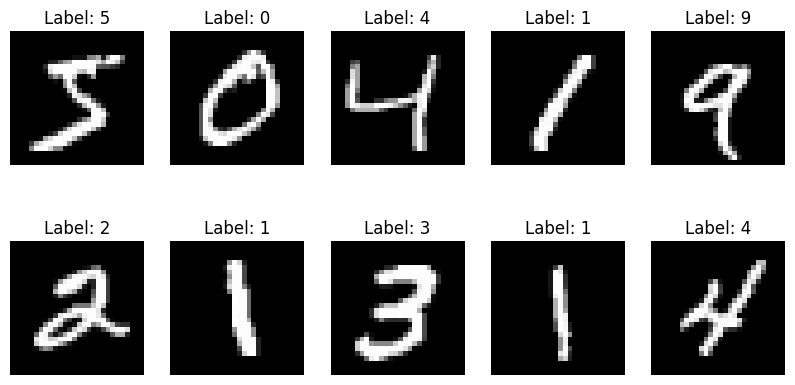

In [4]:
#d Affichage d'un échantillon d'images :

import matplotlib.pyplot as plt

# Afficher 10 images du dataset avec leurs labels
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.show()


Le chargement de tensorboard permettra de visualiser les outputs de l'apprentissage dans un environnement adapté.

**Question 1** :

a) Combien d'images contiennent les jeux d'entrainement et de test ?

b) Les classes sont-elles uniformément représentées dans ces jeux de données ?

c) Renormaliser ces deux jeux de données de sorte que les niveaux de gris de chaque pixel soient compris entre 0 et 1

d) Représenter un échantillon d'images tirées du jeu de données d'entrainement.



In [3]:
#c Renormalisation des images :

x_train = x_train / 255.0
x_test = x_test / 255.0


a) Nombre d'images dans les jeux d'entraînement et de test :
Le dataset MNIST contient :

60,000 images dans l'ensemble d'entraînement (x_train).
10,000 images dans l'ensemble de test (x_test).

b) Vérification de la distribution des classes :
On peut vérifier si les classes sont uniformément réparties en comptant le nombre d'occurrences de chaque chiffre (0 à 9) dans y_train et y_test.

## 2. Modèle de calcul (réseaux de type FFNN)

Lorsqu'on a chargé les données, la prochaine étape est la construction d'un modèle de calcul (réseau de neurones). C'est une étape plus ou moins simple selon : la complexité du réseau sous-jacent et le niveau de paramétrisation désiré. Dans le cadre de cette introduction, on travaille avec une architecture simple et l'on considère l'implémentation la plus simple et directe possible. On aura recours, comme annoncé, à l'API Keras.

**Question 2:**

a) A l'aide de $\texttt{Sequential}$, construire un modèle possédant les caractéristiques suivantes:

**Spécification du modèle FFNN**

  -Une couche $\texttt{Flatten}$ qui convertit les données en tableau 1D.

  -Une couche cachée $\texttt{Dense}$ à $n_1=128$ neurones dont les fonctions d'activation sont sigmoidales

  -Une couche de sortie $\texttt{Dense}$ à $n_2=10$ neurones dont la fonction d'activation globale est une fonction softmax

  -les poids des connexions associées aux deux couches denses sont initialisées via des lois normales selon la méthode proposée par Glorot (-> https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf).

b) Assembler et visualiser le modèle ainsi construit à l'aide des fonctions $\texttt{build}$ et $\texttt{summary}$ de la classe $\texttt{Model}$.

c) Quel est le nombre $n_0$ de neurones associés la couche $\texttt{Flatten}$ ?

d) Pourquoi utiliser une fonction softmax pour la dernière couche ? Que représente la sortie du modèle ?

e) Combien de paramètres "entrainables" comporte le modèle ?

f) Afficher la distribution initiale des poids sur les deux couches denses. Comment modifier celle-ci ?



In [8]:
#Comment modifier cette distribution ?

layers.Dense(128, activation='sigmoid', kernel_initializer='he_normal')


<Dense name=dense_2, built=False>

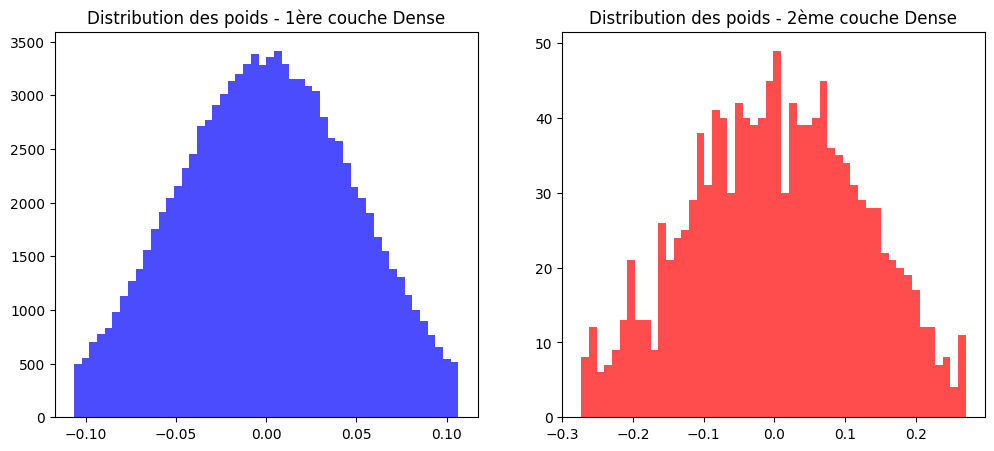

In [7]:
#f Distribution initiale des poids

import matplotlib.pyplot as plt

# Récupération des poids des couches denses
weights_1 = model.layers[1].get_weights()[0].flatten()  # Poids de la 1ère couche dense
weights_2 = model.layers[2].get_weights()[0].flatten()  # Poids de la couche de sortie

# Tracé des histogrammes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(weights_1, bins=50, color='blue', alpha=0.7)
plt.title("Distribution des poids - 1ère couche Dense")

plt.subplot(1, 2, 2)
plt.hist(weights_2, bins=50, color='red', alpha=0.7)
plt.title("Distribution des poids - 2ème couche Dense")

plt.show()


e) Nombre de paramètres entraînables
On calcule les paramètres de chaque couche :

Couche Dense (128 neurones) :

Entrées : 784
Poids :
784
×
128
=
100352
784×128=100352
Biais :
128
128
Total :
100352
+
128
=
100480
100352+128=100480
Couche Dense (10 neurones) :

Entrées : 128
Poids :
128
×
10
=
1280
128×10=1280
Biais :
10
10
Total :
1280
+
10
=
1290
1280+10=1290
Nombre total de paramètres entraînables :
100480
+
1290
=
101770
100480+1290=101770

d) Pourquoi utiliser softmax en sortie ?
La softmax transforme les scores des 10 neurones en probabilités qui totalisent 1.
Chaque sortie représente la probabilité d’appartenir à une classe (chiffres 0 à 9).
Cela permet d’interpréter facilement le résultat : le plus grand score indique la classe prédite.

c) Nombre de neurones dans la couche Flatten
La couche Flatten transforme chaque image 28×28 en un vecteur 784 (car 28 × 28 = 784).

Réponse :
𝑛
0
=
784
n
0
​
 =784

In [6]:
#b Assemblage et visualisation du modèle :

# Compilation du modèle (sans entraînement)
model.build(input_shape=(None, 28, 28))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#a Construction du modèle avec Sequential :

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Définition du modèle
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Convertit en vecteur 1D
    layers.Dense(128, activation='sigmoid', kernel_initializer='glorot_normal'),
    layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 3. Entrainement : compilation et calibration

Lors de cette phase, on doit préciser les modalités de l'entrainement du modèle : fonction de perte, poids entrainables, algorithmes d'optimisation à utiliser, ... Ceci est réalisé par $\texttt{compile}$.

-> https://keras.io/api/models/model_training_apis/

Il faut bien comprendre qu'à ce stade, on ne lance pas encore l'entrainement réel. On en décrit simplement les paramètres en vue des calculs menés lors de la prochaine étape.

**Question 3:**

a) A l'aide la méthode $\texttt{compile}$, préparer la calibration pour la configuration suivante:

-fonction de perte: entropie croisée

-algorithme d'optimisation: gradient stochastique avec taux d'apprentissage $\eta=0.001$.

-métrique : précision

b) Quel est le rôle de SGD ? Outre SGD, quels algorithmes sont disponibles ?

c) Justifier le choix de la fonction de perte
$\texttt{SparseCategoricalCrossentropy}$.

d) Quelle est la différence entre la métrique et la fonction de perte ?



La méthode $\texttt{fit}$ ci-dessous permet de lancer l'entrainement proprement dit. On retient **dans un premier temps** les paramètres suivants.

- batch_size = 128
- epochs = 100
- validation_split = 0.3

**Question 4:**

a) A quoi correspond le nombre d'époques dans l'appel à la fonction ? Et le paramètre batch_size (taille de lot en français) ? Comment impactent-ils la rapidité de l'apprentissage ?

b) Quel est la signification du paramètre validation_split ? Quelle différence avec le jeu de données test ?

c) Quelle est la valeur finale de la fonction de perte à l'issue de la phase d'entrainement  ? Quelle est la valeur finale de la précision sur les échantillons réservés pour la phase de validation ?

d) L'entrainement vous semble-t-il terminé ?

In [ ]:
## Step 4
## Entrainement et analyse des résultats

## Paramétrage des "callback" vers Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

## Paramétrage de l'entrainement
....

%tensorboard --logdir logs/fit



**Question 5:**

a) Afficher la prédiction du modèle pour le premier échnatillon de test. Expliquer l'output. Le résultat vous parait-il cohérent ?

b) Evaluer la performance du modèle sur la totalité des échantillons de test.

## 4. Optimisation de l'apprentissage

**Question 6:**

a) Pour le même modèle et les mêmes (hyper)paramètres d'apprentissage, on décide d'avoir recours à un nouvel algorithme d'optimisation Adam (-> https://www.tensorflow.org/api_docs/python/tf/keras/optimizers, https://arxiv.org/abs/1412.6980). A nombre d'époques et taille de lots constants, réentrainez le modèle de FFNN défini précédemment.

b) Comment interpréter l'évolution des fonctions de perte d'entrainement et de validation dans ce cas ?

c) Afin de réduire le phénomène observé, on décide d'avoir recours à une technique dite de dropout avec un taux de 1/4 (-> https://www.tensorflow.org/tutorials/keras/overfit_and_underfit). Réinitialiser et réentrainer le même modèle en tenant compte de cette procédure. Que constatez-vous ?

d) Etudier numériquement la dépendance de la perte (*loss*) finale en fonction de $n_1$ pour les lots d'entrainement, de validation et de test (nombres d'époques $T=20$) à nombre d'époques et taille de lots constants (algorithme d'optimisation fixé -> Adam)

e) Proposer deux modèles de type FFNN à plusieurs couches cachées dont le nombre de paramètres est du même ordre de grandeur que celui associé au modèle à une couche cachée à $n_1=64$ neurones. Discuter l'influence de la profondeur en terme de performance.